In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [11]:
@dataclass
class DiscriminantFunction:
    A: np.ndarray
    B: np.ndarray
    C: float
    
    def __call__(self, x: np.ndarray):
        return x.T.dot(self.A).dot(x) + self.B.T.dot(x) + self.C
    
    def __str__(self):
        x1, x2 = sp.symbols('x1 x2')
        X = sp.Matrix([x1, x2])
        A = sp.Matrix(self.A)
        B = sp.Matrix(self.B)
        C = self.C
        Xt_A_X = sp.det(X.T @ A @ X)
        Bt_X = sp.det(B.T @ X)
        return str(Xt_A_X + Bt_X + C).replace('**', '^')

In [12]:
def g_of_x(X: np.ndarray, prob: float, case: int = 3):
    X_mean = X.mean(axis=0)
    X_cov = cov(X)
    X_cov_inv = np.linalg.inv(X_cov)
    X_cov_det = np.linalg.det(X_cov)
    
    if case == 1:
        sigma_sq = X_cov[0, 0]
        A = np.zeros_like(X_cov_inv)
        B = X_mean.T / sigma_sq
        C = -0.5 * X_mean.T.dot(X_mean) / sigma_sq + np.log(prob)
    elif case == 2:
        A = np.zeros_like(X_cov_inv)
        B = X_cov_inv.dot(X_mean)
        C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) + np.log(prob)
    elif case == 3:
        A = -0.5 * X_cov_inv
        B = X_cov_inv.dot(X_mean)
        C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) - 0.5 * np.log(X_cov_det) + np.log(prob)
    
    return DiscriminantFunction(A, B, C)

In [13]:
def find_case(w1, w2):
    cov_w1, cov_w2 = cov(w1), cov(w2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3

In [14]:
def cov(X: np.ndarray):
    X = X - X.mean(axis=0)
    return np.dot(X.T, X) / (X.shape[0]-1)

In [15]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-20, 20, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = g1(np.array([X[i, j], Y[i, j]])) - g2(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=[0])

In [16]:
w1 = np.array([
    [1, -1],
    [2, -5],
    [3, -6],
    [4, -10],
    [5, -12],
    [6, -15]
])
w2 = np.array([
    [-1, 1],
    [-2, 5],
    [-3, 6],
    [-4, 10],
    [-5, 12],
    [-6, 15]
])
print(f"w1: {w1}")
print(f"w2: {w2}")

w1: [[  1  -1]
 [  2  -5]
 [  3  -6]
 [  4 -10]
 [  5 -12]
 [  6 -15]]
w2: [[-1  1]
 [-2  5]
 [-3  6]
 [-4 10]
 [-5 12]
 [-6 15]]


In [17]:
current_case = find_case(w1, w2)
print(f"Case {current_case}")
g1 = g_of_x(w1, prob=0.3, case=current_case)
g2 = g_of_x(w2, prob=0.7, case=current_case)
print(f"g1(x) = {g1}")
print(f"g2(x) = {g2}")

Case 2
g1(x) = 10.5000000000001*x1 + 3.50000000000004*x2 - 5.28730613765931
g2(x) = -10.5000000000001*x1 - 3.50000000000004*x2 - 4.44000827727211


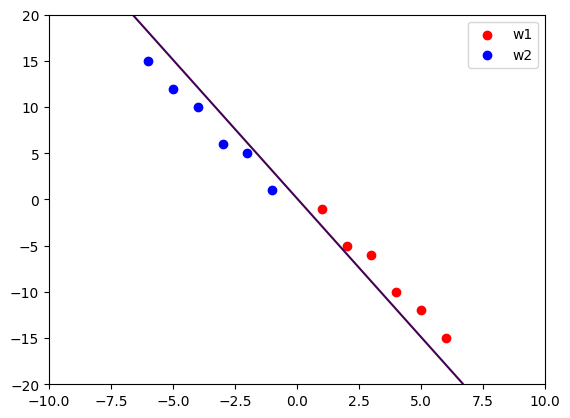

In [18]:
discriminant_plot(g1, g2)
plt.scatter(w1[:, 0], w1[:, 1], c='r')
plt.scatter(w2[:, 0], w2[:, 1], c='b')
plt.legend(['w1', 'w2'])
plt.show()